In [1]:
import cv2
#from skimage import io
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


import math
import os
import random
import shutil
import io
#convert to script:
#jupyter nbconvert --to script *.ipynb
#jupyter nbconvert --to webpdf --allow-chromium-download fotobox-cvml.ipynb


(1198, 1231, 3)
(399, 410, 3)


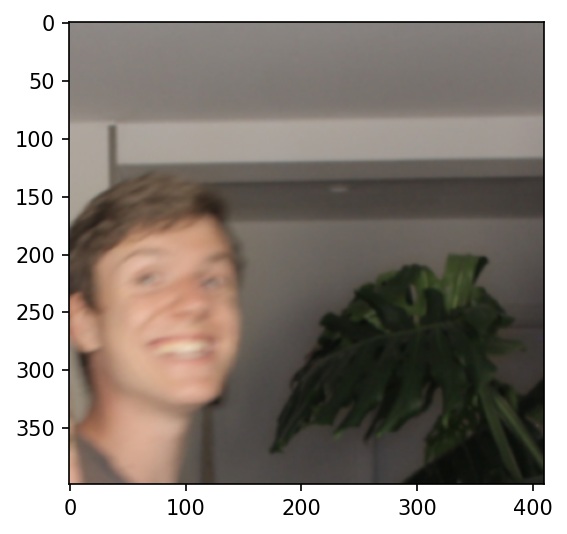

In [2]:
#cap = cv2.VideoCapture(0)
#img = cv2.imread('/content/drive/MyDrive/test.JPG', cv2.IMREAD_GRAYSCALE)
#org_img = cv2.imread('/content/drive/MyDrive/test.JPG')
#org_img = cv2.imread('/content/drive/MyDrive/cvml-emb/test_gruppe.jpg')
#org_img = cv2.imread('test_gruppe.jpg')
org_img = cv2.imread('blur3.jpg')
h_org,w_org,temp = org_img.shape
print(org_img.shape)
reduce_factor = 3
img = cv2.resize(org_img, (int(w_org/reduce_factor), int(h_org/reduce_factor)))
img = cv2.GaussianBlur(img, (5,5), 0)
#img = cv2.imread('/path_to_image/opencv-logo.png', 0) 
#cv2.imshow('image',img) not available in jupyter
#plt.imshow(img, cmap='gray')
plt.figure(figsize=(6, 4), dpi=150)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
print(img.shape)

['blur1.jpg', 'blur2.jpg', 'blur3.jpg']


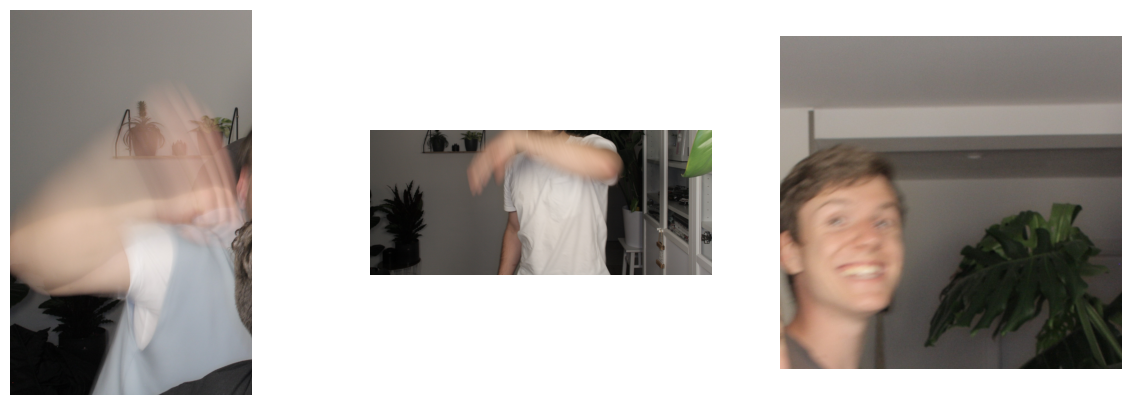

In [6]:
def listImagesInDir(path):
    return len(glob.glob(path))

import glob
image_list = glob.glob("blur*.jpg")
print(image_list)
#images = []
blurred = []

for image in image_list:
    totalfaces = listImagesInDir("blur*.jpg")
    blurred.append(cv2.cvtColor(cv2.imread(image),cv2.COLOR_BGR2RGB))

def show_images(images, titles=None):
    fig, ax = plt.subplots(ncols=len(images), figsize=(len(images)*5,5))

    for idx, image in enumerate(images):
        ax[idx].imshow(image, cmap='gray')
        ax[idx].axis(False)
        if(titles != None):
            ax[idx].set_title(titles[idx])
    return

show_images(blurred)



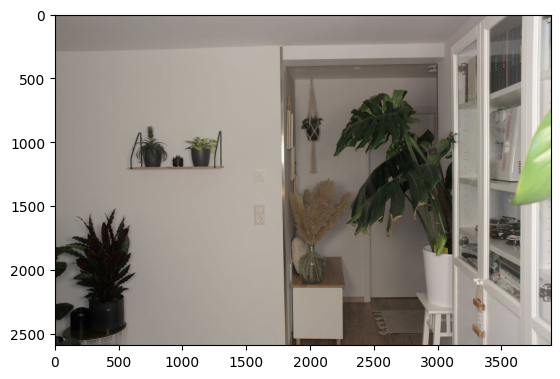

In [11]:
noblur = cv2.imread("noblur.jpg")
noblur = cv2.cvtColor(noblur,cv2.COLOR_BGR2RGB)
plt.imshow(noblur)

In [32]:
#https://pyimagesearch.com/2020/06/15/opencv-fast-fourier-transform-fft-for-blur-detection-in-images-and-video-streams/

# import the necessary packages
import matplotlib.pyplot as plt
import numpy as np
def detect_blur_fft(image, size=60, thresh=10, vis=False):
	# grab the dimensions of the image and use the dimensions to
	# derive the center (x, y)-coordinates
	(h, w) = image.shape
	(cX, cY) = (int(w / 2.0), int(h / 2.0))
		# compute the FFT to find the frequency transform, then shift
	# the zero frequency component (i.e., DC component located at
	# the top-left corner) to the center where it will be more
	# easy to analyze
	fft = np.fft.fft2(image)
	fftShift = np.fft.fftshift(fft)
		# check to see if we are visualizing our output
	if vis:
		# compute the magnitude spectrum of the transform
		magnitude = 20 * np.log(np.abs(fftShift))
		# display the original input image
		(fig, ax) = plt.subplots(1, 2, )
		ax[0].imshow(image, cmap="gray")
		ax[0].set_title("Input")
		ax[0].set_xticks([])
		ax[0].set_yticks([])
		# display the magnitude image
		ax[1].imshow(magnitude, cmap="gray")
		ax[1].set_title("Magnitude Spectrum")
		ax[1].set_xticks([])
		ax[1].set_yticks([])
		# show our plots
		plt.show()
			# zero-out the center of the FFT shift (i.e., remove low
	# frequencies), apply the inverse shift such that the DC
	# component once again becomes the top-left, and then apply
	# the inverse FFT
	fftShift[cY - size:cY + size, cX - size:cX + size] = 0
	fftShift = np.fft.ifftshift(fftShift)
	recon = np.fft.ifft2(fftShift)
		# compute the magnitude spectrum of the reconstructed image,
	# then compute the mean of the magnitude values
	magnitude = 20 * np.log(np.abs(recon))
	mean = np.mean(magnitude)
	# the image will be considered "blurry" if the mean value of the
	# magnitudes is less than the threshold value
	return (mean, mean <= thresh)


# load the input image from disk, resize it, and convert it to
# grayscale


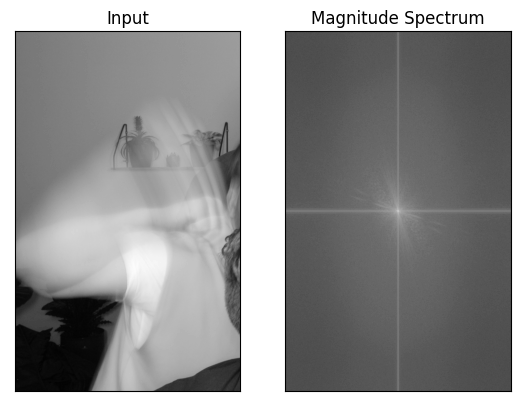

0.9053328168587574
True


In [34]:
orig = cv2.imread("blur1.jpg")
#orig = imutils.resize(orig, width=500)
gray = cv2.cvtColor(orig, cv2.COLOR_BGR2GRAY)
# apply our blur detector using the FFT
(mean, blurry) = detect_blur_fft(gray, size=80,thresh=15, vis=True)
print(mean)
print(blurry)

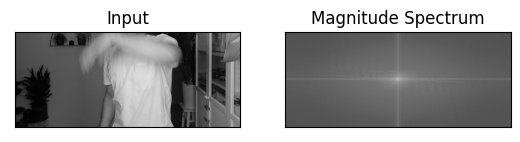

11.155784547352276
True


In [35]:
orig = cv2.imread("blur2.jpg")
#orig = imutils.resize(orig, width=500)
gray = cv2.cvtColor(orig, cv2.COLOR_BGR2GRAY)
# apply our blur detector using the FFT
(mean, blurry) = detect_blur_fft(gray, size=80,thresh=25, vis=True)
print(mean)
print(blurry)

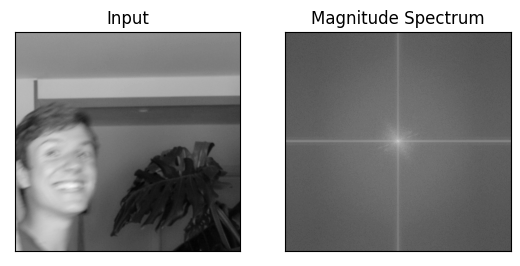

0.5777542752281527
True


In [36]:
orig = cv2.imread("blur3.jpg")
#orig = imutils.resize(orig, width=500)
gray = cv2.cvtColor(orig, cv2.COLOR_BGR2GRAY)
# apply our blur detector using the FFT
(mean, blurry) = detect_blur_fft(gray, size=80,thresh=25, vis=True)
print(mean)
print(blurry)

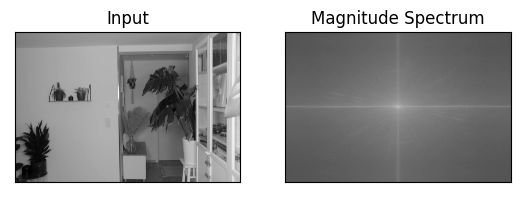

18.929733769510705
False


In [38]:
orig = cv2.imread("noblur.jpg")
#orig = imutils.resize(orig, width=500)
gray = cv2.cvtColor(orig, cv2.COLOR_BGR2GRAY)
# apply our blur detector using the FFT
(mean, blurry) = detect_blur_fft(gray, size=60,thresh=15, vis=True)
print(mean)
print(blurry)